In [1]:
import pandas as pd

df = pd.read_csv('canada-mig-dataset.csv')

df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [2]:
df['OdName']

0         Afghanistan
1             Albania
2             Algeria
3      American Samoa
4             Andorra
            ...      
191    Western Sahara
192             Yemen
193            Zambia
194          Zimbabwe
195           Unknown
Name: OdName, Length: 196, dtype: object

In [3]:
df['OdName'].isin(["China", "India", "Haiti"])

0      False
1      False
2      False
3      False
4      False
       ...  
191    False
192    False
193    False
194    False
195    False
Name: OdName, Length: 196, dtype: bool

In [4]:
df1 = df.loc[ df['OdName'].isin(["China", "India", "Haiti"]) ]
df1.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
36,Immigrants,Foreigners,China,935,Asia,906,Eastern Asia,902,Developing regions,5123,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
75,Immigrants,Foreigners,Haiti,904,Latin America and the Caribbean,915,Caribbean,902,Developing regions,1666,...,1652,1682,1619,1598,2491,2080,4744,6503,5868,4152
79,Immigrants,Foreigners,India,935,Asia,5501,Southern Asia,902,Developing regions,8880,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087


In [5]:
df2 = df1.set_index('OdName')
df2.head()

,Type,Coverage,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
OdName,,,,,,,,,,,,,,,,,,,,,
China,Immigrants,Foreigners,935,Asia,906,Eastern Asia,902,Developing regions,5123,6682,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
Haiti,Immigrants,Foreigners,904,Latin America and the Caribbean,915,Caribbean,902,Developing regions,1666,3692,...,1652,1682,1619,1598,2491,2080,4744,6503,5868,4152
India,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,8880,8670,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087


In [6]:
df3 = df2.iloc[:, 8:42]
df3.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
OdName,,,,,,,,,,,,,,,,,,,,,
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
Haiti,1666,3692,3498,2860,1418,1321,1753,2132,1829,2377,...,1652,1682,1619,1598,2491,2080,4744,6503,5868,4152
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087


In [7]:
df4 = df3.transpose()
df4.head()

OdName,China,Haiti,India
1980,5123,1666,8880
1981,6682,3692,8670
1982,3308,3498,8147
1983,1863,2860,7338
1984,1527,1418,5704


<AxesSubplot:>

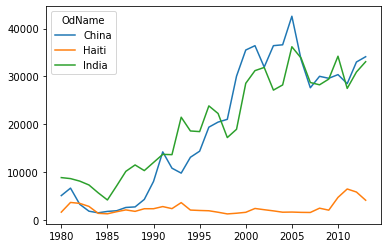

In [8]:
df4.plot(kind='line')

Text(0.5, 0, 'Years')

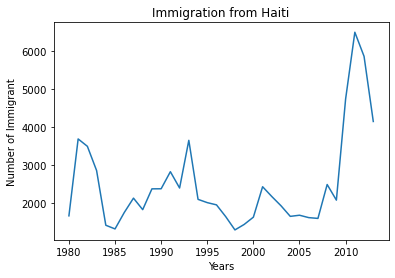

In [9]:
import matplotlib.pyplot as plt
df4["Haiti"].plot(kind='line')
plt.title("Immigration from Haiti")
plt.ylabel("Number of Immigrant")
plt.xlabel("Years")

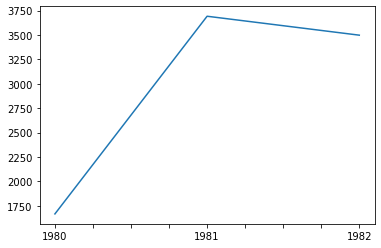

In [10]:
df3_ = df2.loc["Haiti", ["1980","1981","1982"] ].plot(kind='line')

<AxesSubplot:ylabel='Frequency'>

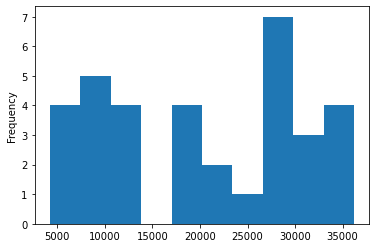

In [11]:
df4['India'].plot(kind='hist')